In [30]:
import pandas as pd
import numpy as np

from train_val import search_space_dict, sigmoid, performing_tv 

from train_val import train_test

#perform one-hot-encoding tranformation

monks_2_train = pd.read_csv('monks-2.train', header=None, sep = '\s+', index_col=None,
                            names = ['class','a1','a2','a3','a4','a5','a6','Id'])

monks_2_test = pd.read_csv('monks-2.test', header=None, sep = '\s+', index_col=None,
                            names = ['class','a1','a2','a3','a4','a5','a6','Id'])


monks_2_train[['a1','a2','a3','a4','a5','a6']] = monks_2_train[['a1','a2','a3','a4','a5','a6']].astype(str)
monks_2_test[['a1','a2','a3','a4','a5','a6']] = monks_2_test[['a1','a2','a3','a4','a5','a6']].astype(str)
  
one_hot_monks_2_train = pd.get_dummies(monks_2_train, columns = ['a1','a2','a3','a4','a5','a6'])
one_hot_monks_2_test = pd.get_dummies(monks_2_test, columns = ['a1','a2','a3','a4','a5','a6'])

train_columns = [x for x in one_hot_monks_2_train.columns[2:]] + [x for x in one_hot_monks_2_train.columns[:2]]
test_columns = [x for x in one_hot_monks_2_test.columns[2:]] + [x for x in one_hot_monks_2_test.columns[:2]]

one_hot_monks_2_train = one_hot_monks_2_train.reindex(columns = train_columns)
one_hot_monks_2_test = one_hot_monks_2_test.reindex(columns = test_columns)

one_hot_monks_2_train = one_hot_monks_2_train.drop(['Id'], axis = 1)
one_hot_monks_2_test = one_hot_monks_2_test.drop(['Id'], axis = 1)

X_train = np.array(one_hot_monks_2_train)
X_test = np.array(one_hot_monks_2_test)

In [43]:
search_space_def = search_space_dict(layers_range=[1], units_range=[4], eta_0_range=[0.9],
                        alpha_range=[0.9], lamb_range=[0.001], lamb0_range = [0.0], minibatch_size_range = [30],num_targets=1, configurations = 0)    

search_space_def[0][0]

{'units': array([4, 1]),
 'layers': 2,
 'eta_0': 0.9,
 'alpha': 0.9,
 'lamb': 0.001,
 'lamb0': 0.0,
 'minibatch_size': 30}

training error 0.1232271755044077, test error 0.2370592267883917
training error 0.12036237452639842, test error 0.22777764443027937
training error 0.11834457235658472, test error 0.22776576981641422
training error 0.11827018260674049, test error 0.2264366768948725
training error 0.11824682476738271, test error 0.22556149935181577
training error 0.11793355926087433, test error 0.22361158823552665
training error 0.1175723891191181, test error 0.2234486749044318
training error 0.11845473858734255, test error 0.22395360735106634
training error 0.11758551672499744, test error 0.2226564821298579
training error 0.11758249798027944, test error 0.22335154332946458
training error 0.11772165422851526, test error 0.22399234375106902
training error 0.11743615441790102, test error 0.22333437555706742
training error 0.1178235777653484, test error 0.2226897963174804
training error 0.11735015035408639, test error 0.22392858634620882
training error 0.11769319144089403, test error 0.2231473682977184
trai

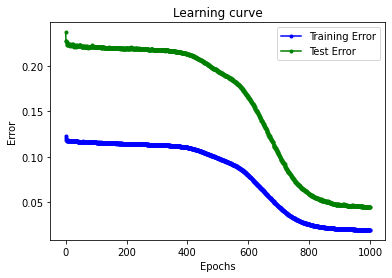

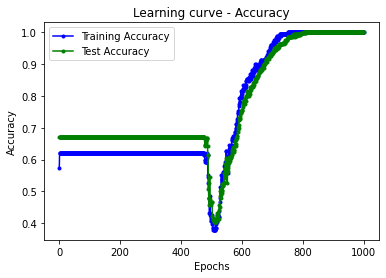

1.0 0.0445457458330642


([<topologyNN.HiddenLayer at 0x7f003bf462e0>,
 1.0,
 0.0445457458330642,
 0.019750629381561677,
 1.0)

In [44]:
seed = 0
train_test(hyperparams = search_space_def[0][0],
           num_inputs = 17, seed = seed, activation_output = sigmoid, activation_hidden = sigmoid,
           task = 'binary_classification', thr = 0.5, stop_class = 'GL', stop_param = 3, data_train = X_train, data_val = X_test)


training error 0.12306880616707778, test error 0.2387383345865731
training error 0.12039099687398039, test error 0.22973125209139716
training error 0.11865304529673648, test error 0.22710820738866735
training error 0.11796265002492849, test error 0.2260545807648948
training error 0.11789051592107046, test error 0.22497595581184093
training error 0.11776791791987747, test error 0.22478784745916677
training error 0.11785065967422181, test error 0.22521570559003673
training error 0.1176485439009073, test error 0.22351874685517226
training error 0.11771286165474337, test error 0.22334061137476993
training error 0.1175112318869083, test error 0.222568631347858
training error 0.11771252545325891, test error 0.222544510167683
training error 0.11747645082275347, test error 0.2223656629950359
training error 0.11773020218160153, test error 0.22252534938459473
training error 0.11763274963428706, test error 0.22244863521457287
training error 0.11750301837259983, test error 0.22262968846980244
trai

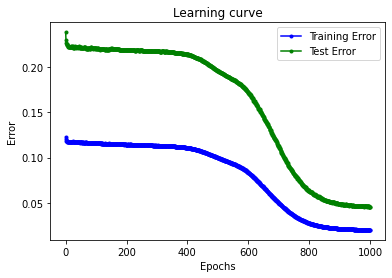

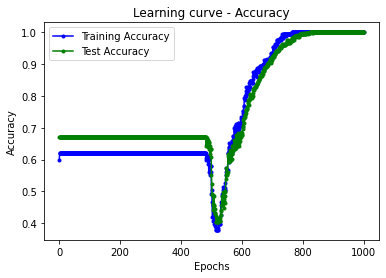

1.0 0.045563782866677546
training error 0.12308360421103581, test error 0.2363218794786175
training error 0.1196852518080045, test error 0.23132259359629131
training error 0.11930727707229058, test error 0.22765041980241854
training error 0.11826088081712176, test error 0.2243216051993731
training error 0.11813970037544307, test error 0.22430121031548148
training error 0.11769187774511806, test error 0.22362155901002015
training error 0.11789877502711588, test error 0.2240470843020312
training error 0.11790999399995439, test error 0.22493906034997974
training error 0.11765573140697863, test error 0.22431461191699908
training error 0.11800078534284614, test error 0.22276793651712723
training error 0.11755291811463578, test error 0.22278543056686873
training error 0.11744202032914877, test error 0.22280070333124624
training error 0.11786512549719944, test error 0.2236402926362716
training error 0.11755947563613788, test error 0.22334941363869995
training error 0.11749552654864162, test e

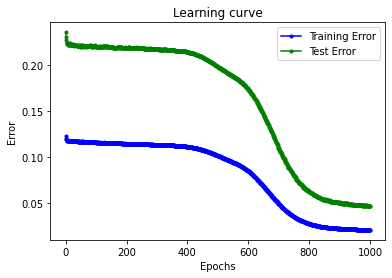

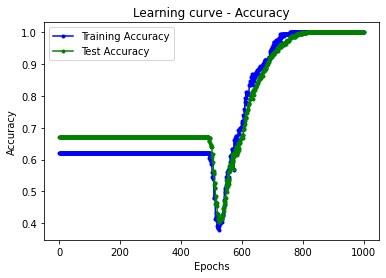

1.0 0.04651292722852802
training error 0.12345626668996616, test error 0.23503698342072055
training error 0.11942055704508789, test error 0.2287390686921781
training error 0.11835688136552407, test error 0.22780826109143448
training error 0.11848106252682389, test error 0.22425582220800747
training error 0.1179768107716955, test error 0.2241304600319823
training error 0.11792140159459968, test error 0.22306379345323152
training error 0.11771219884196332, test error 0.2228347957035588
training error 0.11770338039126564, test error 0.22340602362688192
training error 0.1176049867039552, test error 0.22287456838297146
training error 0.11748195881390142, test error 0.22302298188314168
training error 0.11759896851344112, test error 0.22345458599807244
training error 0.11752865609484073, test error 0.22278446676060368
training error 0.11745293073967446, test error 0.22301691407148191
training error 0.11771523622021134, test error 0.22394687028661325
training error 0.11770199848489282, test er

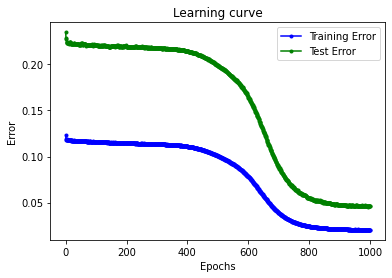

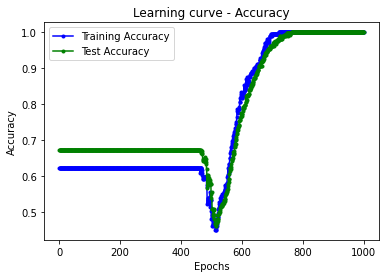

1.0 0.04614157986485521
training error 0.12317939181838716, test error 0.23643276486543133
training error 0.11993640250035158, test error 0.22921797295759969
training error 0.1187144040760686, test error 0.2271597108314226
training error 0.11838525965355981, test error 0.22593259326724635
training error 0.11791051412570251, test error 0.22472409391962417
training error 0.11844831978085667, test error 0.2231372808236321
training error 0.1178059351118697, test error 0.22414942839270816
training error 0.11778786940716575, test error 0.2229399044083608
training error 0.11757110954952722, test error 0.222485587691558
training error 0.11800474578049552, test error 0.22257271545142396
training error 0.11763438306017984, test error 0.22341260018566528
training error 0.11772408211141076, test error 0.2228916078979272
training error 0.11755049111877953, test error 0.22266116322353982
training error 0.1176548412397177, test error 0.22293620584635188
training error 0.11740727792433865, test error 

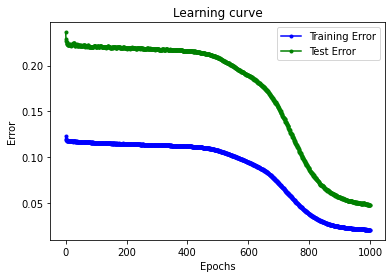

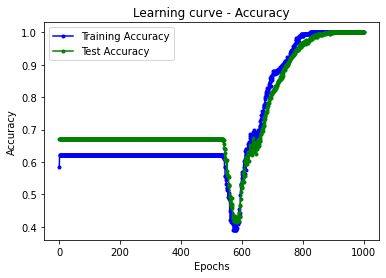

1.0 0.04778239047640881
training error 0.12319176360009813, test error 0.23685031303664464
training error 0.1198886297050329, test error 0.2318960290860955
training error 0.11883547047263496, test error 0.22750491954756058
training error 0.11836405880644649, test error 0.22520787418746613
training error 0.11785321790075354, test error 0.22412518020503744
training error 0.11786588924708818, test error 0.22376363205186145
training error 0.1177221159783889, test error 0.2233873724699701
training error 0.11779871146760441, test error 0.22228066980947406
training error 0.11783267919018302, test error 0.2216328917397937
training error 0.11770656154329887, test error 0.22185849199588728
training error 0.11768063452604331, test error 0.22234891196336948
training error 0.11750893047219288, test error 0.22237971917034968
training error 0.11782548681548438, test error 0.22277327291776625
training error 0.11812302924399663, test error 0.22329757462548797
training error 0.11766898236526462, test er

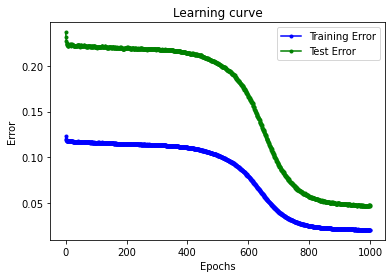

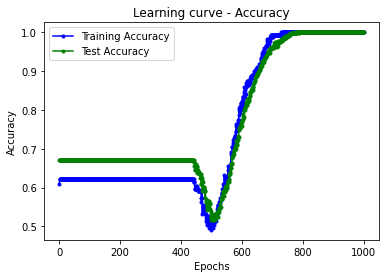

1.0 0.046933152627297775
training error 0.12312408114550852, test error 0.23706464504867658
training error 0.11985625279395781, test error 0.2312052316062369
training error 0.11868631857666712, test error 0.22688839569941682
training error 0.11889320425466347, test error 0.2253033806911702
training error 0.11796518893324721, test error 0.22623622591356618
training error 0.11793422521834598, test error 0.22540607477003788
training error 0.11788932271590648, test error 0.22419489321502725
training error 0.1179433945510415, test error 0.22301801587478376
training error 0.11756700256959199, test error 0.22329567030902278
training error 0.11765826295316274, test error 0.2223815037103364
training error 0.11756008991170877, test error 0.22266509241150267
training error 0.11782705895526713, test error 0.22328248293979153
training error 0.11750744701399317, test error 0.22398489318904347
training error 0.11765482590545687, test error 0.22316898479304037
training error 0.11748190393136522, test 

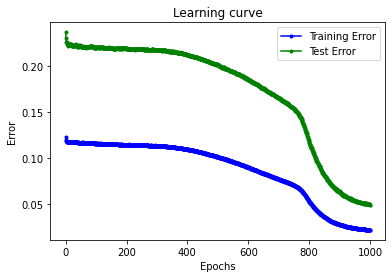

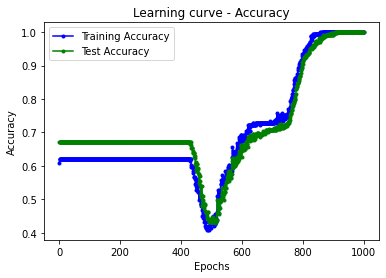

1.0 0.04920667512674383
training error 0.1237913309912479, test error 0.23502684585411643
training error 0.11969682456201318, test error 0.22808970709073476
training error 0.11823404619729738, test error 0.22709082352639184
training error 0.11819014570594798, test error 0.22552964281427
training error 0.11784380101281629, test error 0.22390224996821964
training error 0.11772299380750557, test error 0.2243466660453418
training error 0.11785615041918826, test error 0.22455716575688656
training error 0.11775823647682725, test error 0.2249239487490388
training error 0.11797025489893187, test error 0.2242089933350878
training error 0.11759554589159976, test error 0.2247418513017679
training error 0.11841413400058758, test error 0.22325507892840873
training error 0.117577577210957, test error 0.22244229212559166
training error 0.11760488656522104, test error 0.2231507468645046
training error 0.11752029787477923, test error 0.223181162604346
training error 0.11757673022383588, test error 0.22

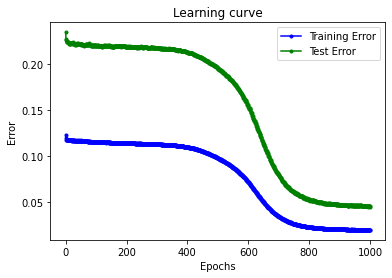

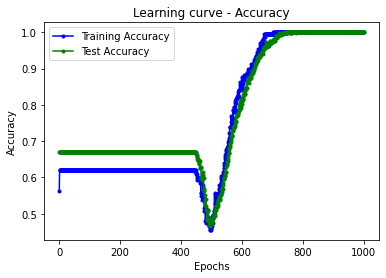

1.0 0.04556395446121027
training error 0.1231028210068331, test error 0.23702980197935242
training error 0.11989027972281796, test error 0.22807449653977754
training error 0.11812392473049808, test error 0.2256719555869147
training error 0.11785747472497124, test error 0.22419634373757139
training error 0.11802181195886487, test error 0.22517986038270416
training error 0.11771182560886605, test error 0.22425168539585355
training error 0.11774736824639058, test error 0.22312976953745073
training error 0.11776713349562613, test error 0.22378180281422086
training error 0.11762392076674778, test error 0.22364262363182527
training error 0.11757280887438958, test error 0.2233885031179479
training error 0.11776428693744925, test error 0.22358639285605456
training error 0.11760429725046041, test error 0.2232118897041749
training error 0.11776577770503922, test error 0.22300972139905847
training error 0.11758667755010661, test error 0.22315204829790525
training error 0.11750850344811103, test e

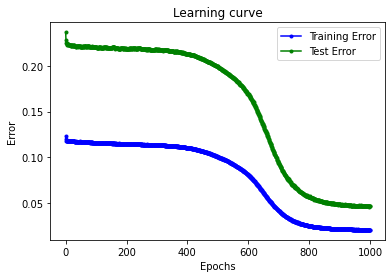

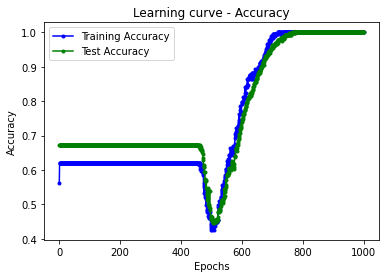

1.0 0.04624246214101042
training error 0.12301991006736625, test error 0.23925845773885654
training error 0.12047120690132576, test error 0.23374149547409973
training error 0.11926054580393311, test error 0.22983979258883575
training error 0.11835396063505596, test error 0.22724729573772173
training error 0.11802263841883749, test error 0.22475929015185284
training error 0.11789258042663558, test error 0.22427127118226883
training error 0.1181457311616514, test error 0.22326458663286997
training error 0.11779793595631693, test error 0.22406592878549547
training error 0.11770594401445905, test error 0.22344599151023425
training error 0.11780392647963688, test error 0.22263964025875493
training error 0.11759184720773383, test error 0.2235545041205151
training error 0.11760106099047321, test error 0.22268944583055322
training error 0.11750276417178082, test error 0.2232048956080779
training error 0.11740179803149399, test error 0.22325304789513425
training error 0.11756025291356255, test 

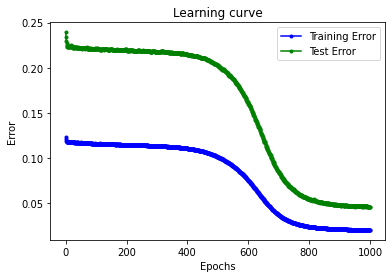

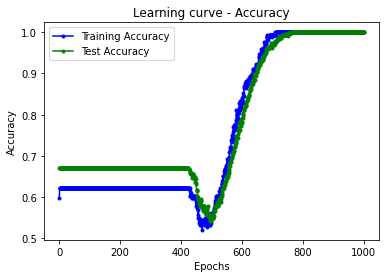

1.0 0.04622540765376571
training error 0.12328474523989054, test error 0.2355173230807778
training error 0.12022062493540824, test error 0.23137557872032155
training error 0.11910008815443603, test error 0.22752517478118198
training error 0.11805082806208249, test error 0.22613980163826364
training error 0.11845551800960188, test error 0.22541774439813453
training error 0.11788862118759706, test error 0.2256631031183606
training error 0.11789524394454327, test error 0.22481765509891455
training error 0.117957456024873, test error 0.22382814115978228
training error 0.11859424957101079, test error 0.22248908914138257
training error 0.11789617028192045, test error 0.22349794144640833
training error 0.11744506581866644, test error 0.22308523932828248
training error 0.11767933563336484, test error 0.22332676142697472
training error 0.11742147641087058, test error 0.22298224562174024
training error 0.11741895082937553, test error 0.22310192632902137
training error 0.11753916086939914, test e

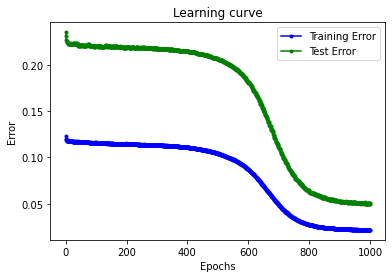

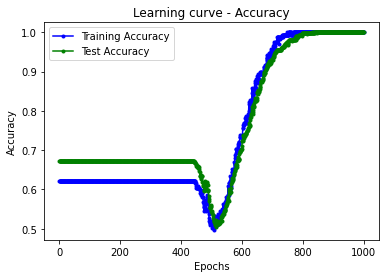

1.0 0.050101880098577634


In [45]:
error_vals = []
acc_vals = []

error_trains = []
acc_trains = []

models = []

for i in range(10):
  model, acc_val, error_val, error_train, acc_train = train_test(hyperparams = search_space_def[0][0],
           num_inputs = 17, seed = i, activation_output = sigmoid, activation_hidden = sigmoid,
           task = 'binary_classification', thr = 0.5, stop_class = 'GL', stop_param = 3, data_train = X_train, data_val = X_test)
  
  models += [model]

  acc_vals += [acc_val]
  error_vals += [error_val]
  

  error_trains += [error_train]
  acc_trains += [acc_train]


In [46]:
print('Test error, mean test error and std test error')
print(error_vals)
print(np.mean(error_vals), np.std(error_vals)) 

print('Test accuracy, mean test accuracy and std test accuracy')
print(acc_vals)
print(np.mean(acc_vals), np.std(acc_vals)) 

print('Train error, mean train error and std train error')

print(error_trains)
print(np.mean(error_trains), np.std(error_trains)) 

print('Train accuracy, mean train accuracy and std train accuracy')

print(acc_trains)
print(np.mean(acc_trains), np.std(acc_trains)) 

Test error, mean test error and std test error
[0.045563782866677546, 0.04651292722852802, 0.04614157986485521, 0.04778239047640881, 0.046933152627297775, 0.04920667512674383, 0.04556395446121027, 0.04624246214101042, 0.04622540765376571, 0.050101880098577634]
0.04702742125450752 0.0014619537545720158
Test accuracy, mean test accuracy and std test accuracy
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0 0.0
Train error, mean train error and std train error
[0.019984602485201935, 0.020301494384707137, 0.02028039582528332, 0.02082692809196697, 0.02059802127853551, 0.0217416780156867, 0.020280051279609, 0.020261766114572474, 0.02028747900323322, 0.021613078040008504]
0.020617549451880476 0.0005711901171000615
Train accuracy, mean train accuracy and std train accuracy
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0 0.0
